In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def compute_power(voltage: float, current: float) -> float:
    """ 
        power = voltage * current
        watts = volts * amps 
    """
    power = voltage * current
    return power


def compute_energy(power: float, start_time: float, end_time: float) -> float:
    """
        Considering energy in watthour, power in watts, time in seconds:
            energy = power * (end_time - start_time)
            watthour = watt * hour = watt * seconds / 3600
    """
    time_interval = end_time - start_time
    energy = power * time_interval / 3600
    return energy

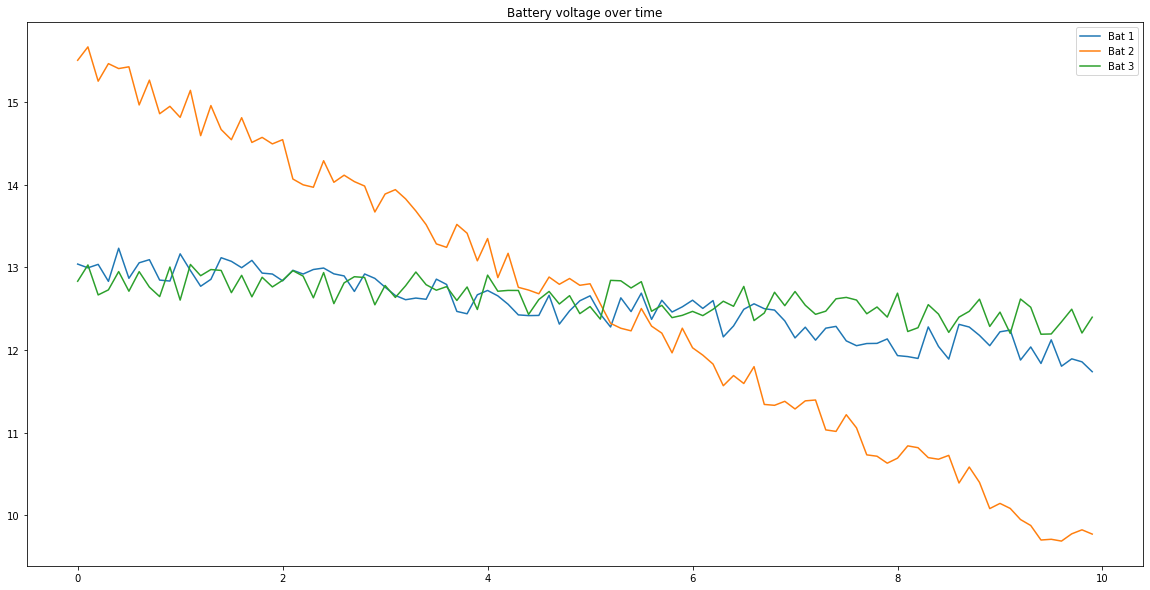

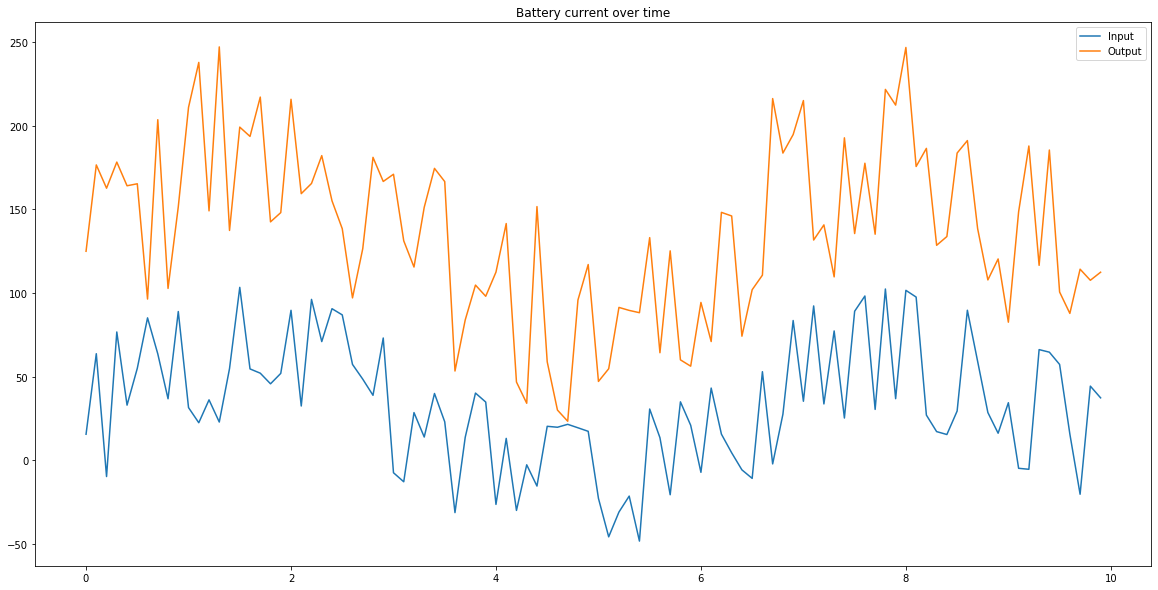

In [104]:
length = 100
t = np.arange(length)*0.1

i_bat_in = 20 + 40*(np.sin(t) + np.sin(t+100*np.random.sample(length))) + 5*np.random.sample(length)
i_bat_out = 100 + 50*(np.sin(t) + np.sin(t+100*np.random.sample(length))) + 50*np.random.sample(length)

v_bat_1 = np.linspace(12.8, 11.7, length) + 0.5*np.random.sample(length)
v_bat_2 = np.linspace(15.3, 9.4, length) + 0.5*np.random.sample(length)
v_bat_3 = np.linspace(12.65, 12.1, length) + 0.5*np.random.sample(length)

plt.figure(figsize=(20,10))
plt.title('Battery voltage over time')
plt.plot(t, v_bat_1, label='Bat 1')
plt.plot(t, v_bat_2, label='Bat 2')
plt.plot(t, v_bat_3, label='Bat 3')
plt.legend()

plt.figure(figsize=(20,10))
plt.title('Battery current over time')
plt.plot(t, i_bat_in, label='Input')
plt.plot(t, i_bat_out, label='Output')
plt.legend()

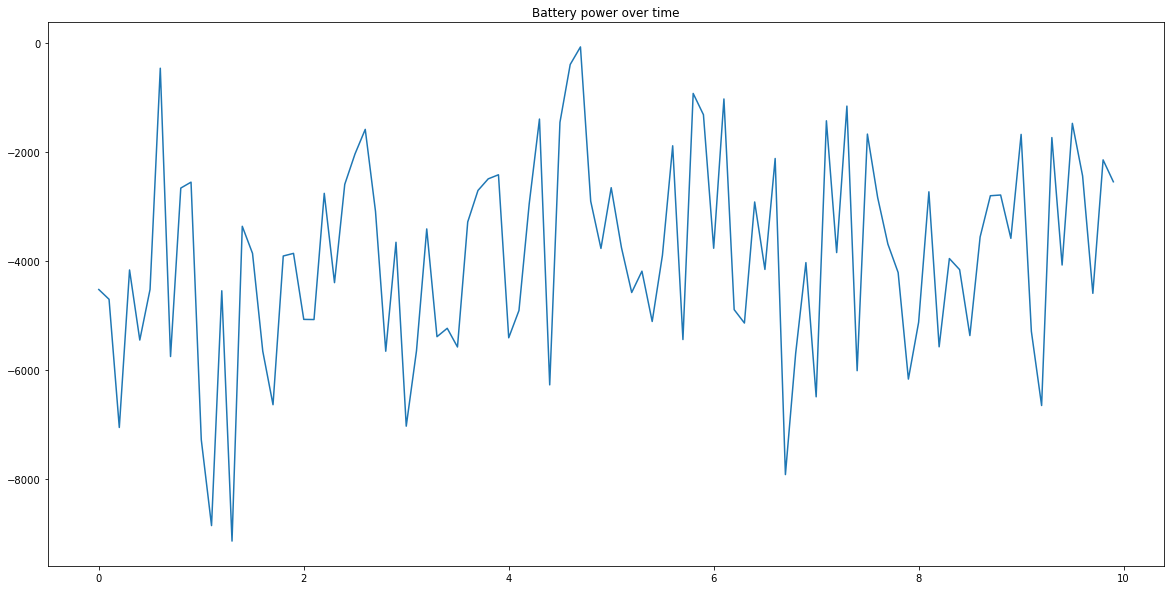

In [105]:
# battery current is positive when charging, negative when discharging:
battery_current = i_bat_in - i_bat_out

# battery bank is three 12v battery series connection:
battery_voltage = v_bat_1 + v_bat_2 + v_bat_3

battery_power = compute_power(battery_voltage, battery_current)

plt.figure(figsize=(20,10))
plt.title('Battery power over time')
plt.plot(t, battery_power)

In [121]:
battery_initial_energy = 15
battery_used_energy = 0
for k in range(1, t.size):
    battery_used_energy = battery_used_energy + compute_energy(battery_power[k], t[k], t[k-1])

battery_final_energy = battery_initial_energy - battery_used_energy
print('initial:', battery_initial_energy, 'wh')
print('used:', battery_used_energy, 'wh')
print('final:', battery_final_energy, 'wh')


initial: 15 wh
used: 10.791066719044066 wh
final: 4.208933280955934 wh
